In [54]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
import sweetviz as sv
from pandas_profiling import ProfileReport

In [87]:
mp = pd.read_csv('~/Desktop/Metaphlan4_all_pheno.csv').rename(columns={'Unnamed: 0' : 'External ID'})
mp = mp.set_index('External ID')
mp

,k__Bacteria,p__Firmicutes,p__Bacteroidetes,p__Proteobacteria,p__Actinobacteria,c__Clostridia,c__Bacteroidia,c__Negativicutes,c__Firmicutes_unclassified,c__Betaproteobacteria,...,t__SGB47656,t__SGB14139,t__SGB1890,s__Prevotella_sp_DNF00663,s__Collinsella_SGB14747,t__SGB3322,t__SGB14747,t__SGB4194,t__SGB6499,t__SGB4510
External ID,,,,,,,,,,,,,,,,,,,,,
PSM7J14T,100.00000,71.02855,26.85212,1.89661,0.22272,55.95542,26.85212,12.28881,2.64634,0.98112,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
CSM79HOL,100.00000,34.80297,63.49096,1.49113,0.21495,30.54465,63.49096,2.56962,0.32024,1.44817,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
CSM67U9D,100.00000,54.68728,44.23327,0.82266,0.25679,50.51548,44.23327,2.28682,0.51562,0.73302,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
MSM6J2MF,100.00000,96.47442,0.24335,3.10878,0.16437,82.71787,0.24335,13.23502,0.51562,0.73302,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
HSM7J4N4,100.00000,27.30707,71.32484,1.35394,0.01415,25.32084,71.32484,1.39104,0.44382,0.01219,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MSMA26BL,100.00000,36.18427,61.89923,1.72077,0.19572,34.43199,61.89923,1.54756,0.03789,1.05422,...,0.01596,0.00765,0.00649,0.02668,0.01905,0.02668,0.01905,0.21992,0.02074,0.01415
MSM79H9A,99.84673,36.69046,58.88541,0.98279,0.58879,33.53007,58.88541,0.38769,0.00567,0.04974,...,0.01596,0.00765,0.00649,0.02668,0.01905,0.02668,0.01905,0.21992,0.02074,0.01415
HSM7J4KK,100.00000,33.89929,62.37670,1.84729,0.81156,31.61819,62.23758,0.55590,0.16380,0.93262,...,0.01596,0.00765,0.00649,0.02668,0.01905,0.02668,0.01905,0.21992,0.02074,0.01415


In [88]:
select_sampels = pd.read_csv('~/Desktop/selected_samples_MGX.csv')
select_sampels = select_sampels.set_index('External ID')
select_sampels.drop("Participant ID", inplace=True, axis=1)

In [89]:
mp = mp.loc[select_sampels.index,:]
mp = mp.loc[:,mp.columns.str.startswith('s__')]
mp["diagnosis"] = select_sampels.iloc[:,-1]
mp.reset_index(inplace=True)
mp = mp.replace(0,np.nan)


In [90]:
features = mp.iloc[:, 1:-1]
targets = mp.iloc[:, -1]
features

,s__Phocaeicola_vulgatus,s__Eubacterium_rectale,s__Dialister_invisus,s__Roseburia_faecis,s__Roseburia_inulinivorans,s__Faecalibacterium_prausnitzii,s__Bacteroides_xylanisolvens,s__Firmicutes_bacterium_AF16_15,s__Bacteroides_uniformis,s__Ruminococcus_bromii,...,s__GGB4700_SGB6506,s__GGB3632_SGB4921,s__GGB4710_SGB6522,s__GGB4706_SGB6513,s__GGB3643_SGB4948,s__Sanguibacteroides_SGB1777,s__GGB3632_SGB4920,s__Lachnospiraceae_bacterium_NSJ_46,s__Prevotella_sp_DNF00663,s__Collinsella_SGB14747
0,36.02530,1.45700,1.91898,1.34449,0.03810,0.90627,19.83516,0.28439,17.15467,0.03724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51.31297,0.95498,1.54371,0.04588,0.18414,1.99150,7.95270,0.01466,18.67487,0.34879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.00313,1.29919,1.03434,2.82078,0.00694,10.84042,1.39625,0.00558,16.65207,1.02143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32.29455,3.46622,2.09791,9.10884,0.71850,2.63304,0.00904,0.55343,12.83634,0.12034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40.22876,0.56787,0.15291,0.04742,0.30914,2.20589,0.01291,0.15447,8.33000,0.22200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,5.47393,1.38623,1.06951,0.02240,0.60937,4.65083,2.58785,0.71590,4.14365,0.16762,...,0.05404,0.05911,0.18696,0.23143,0.01579,0.00464,0.04352,0.01596,0.02668,0.01905
79,10.50664,0.27922,0.37723,0.32395,0.08358,3.69814,0.32749,0.19103,1.19686,0.13442,...,0.05404,0.05911,0.18696,0.23143,0.01579,0.00464,0.04352,0.01596,0.02668,0.01905
80,0.00515,1.51739,2.24522,1.38714,0.20735,4.37121,1.14150,0.01921,7.01159,0.22608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,11.31998,10.34149,0.39172,1.97898,0.01503,9.45264,0.02448,0.09630,4.53008,1.02152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
MGX_X = features
MGX_y = targets

#fill NA's
MGX_X.fillna(MGX_X.median(), inplace=True)
MTX_X = StandardScaler().fit_transform(MGX_X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(MTX_X, MGX_y, test_size=0.33, random_state=8)
# y = label_binarize(y_train, classes=[0, 1, 2])
# n_classes = y.shape[1]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/

Best Model:
RandomForestClassifier(max_features=2, min_samples_split=8, n_estimators=5,
                       random_state=8)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/

<AxesSubplot:>

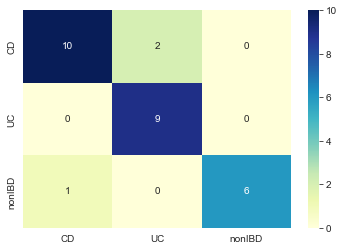

In [92]:
n_estimators_RF = [5, 10, 25, 50, 100]
max_features_RF = [2,4,8,16,32,None]
parameters_RF = {'n_estimators': n_estimators_RF,
                'max_features': max_features_RF}

RF_model = RandomForestClassifier(max_depth=None,
                                  min_samples_split=8, random_state=8)
RF_clf = GridSearchCV(RF_model, parameters_RF, cv=5, scoring= 'roc_auc') #completeness_score')

RF_clf.fit(X_train, y_train)

print("Best Model:")
RF_model = RF_clf.best_estimator_
print(RF_model)

RF_predictions = RF_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_RF = confusion_matrix(y_test, RF_predictions,labels=labels)
cm_RF = pd.DataFrame(cm_RF, index=labels, columns=labels)
sns.heatmap(cm_RF, cmap="YlGnBu", annot=True)

In [93]:
from sklearn import metrics
print(f'Accuracy {round(metrics.accuracy_score(y_test, RF_predictions)*100,2)}%')

Accuracy 89.29%


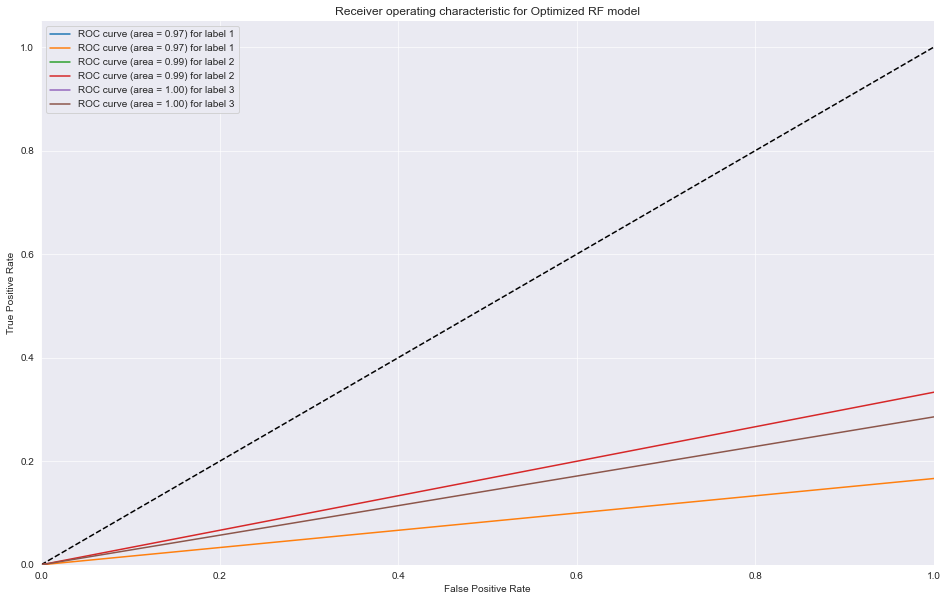

In [106]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc(RF_clf, X_test, y_test, n_classes, figsize=(12, 6)):
    y_score = RF_clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for Optimized RF model')
    labels = np.unique(y_test)
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {round(roc_auc[i],2)}) for {labels[i]}')
    ax.legend(loc="best")
    ax.grid(alpha=.8)
    sns.despine()
    plt.show()
    return fig

RF_model_optimized_roc_auc_curve = plot_multiclass_roc(RF_clf, X_test, y_test, n_classes=3, figsize=(16, 8))

In [14]:
imp_df = pd.DataFrame({
    "": features.columns,
    "feature_importances": RF_clf.best_estimator_.feature_importances_
})
species_threshold = 0.01
feature_importances = imp_df.sort_values(by="feature_importances", ascending=False)

feature_importances['bool'] = feature_importances['feature_importances'] >= species_threshold
feature_importances = feature_importances[feature_importances['bool'] == True].T

feature_importances.columns = feature_importances.iloc[0]
feature_importances = feature_importances[1:1]


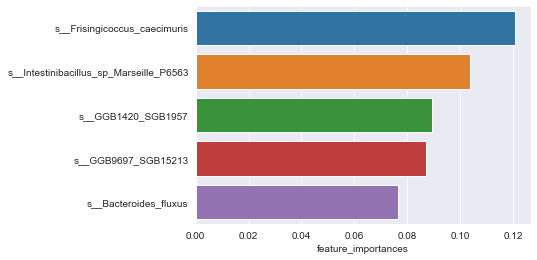

In [15]:
imp_df = pd.DataFrame({
    "": features.columns,
    "feature_importances": RF_clf.best_estimator_.feature_importances_
})
feature_importances_top_5 = imp_df.sort_values(by="feature_importances", ascending=False).head(5)
sns.barplot(x='feature_importances', y= "", data= feature_importances_top_5)
plt.show()
feature_importances_top_5 = feature_importances_top_5.T
feature_importances_top_5.columns = feature_importances_top_5.iloc[0]
feature_importances_top_5 = feature_importances_top_5[1:1]

In [16]:
feature_importances_mp = mp.loc[:,feature_importances_top_5.columns]
feature_importances_mp['diagnosis'] = mp["diagnosis"]
# feature_importances_mp = feature_importances_mp.groupby('diagnosis')
# feature_importances_mp.reset_index(inplace=True)

s__Frisingicoccus_caecimuris


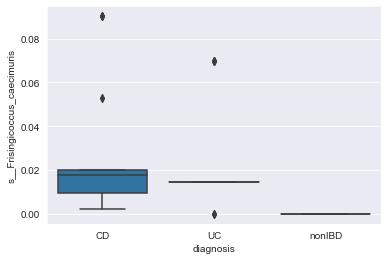

s__Intestinibacillus_sp_Marseille_P6563


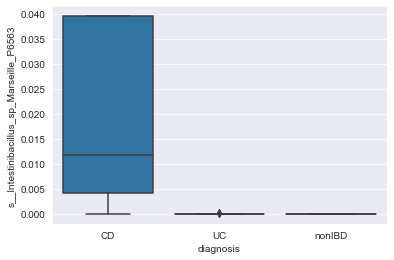

s__GGB1420_SGB1957


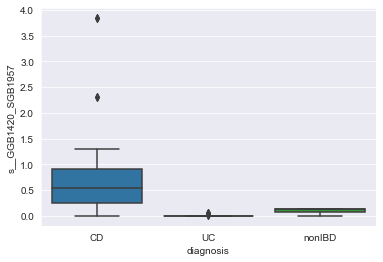

s__GGB9697_SGB15213


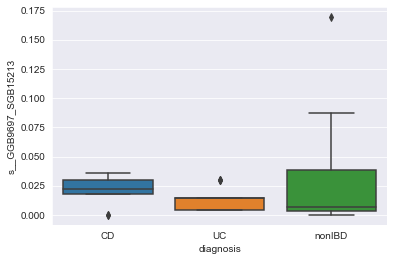

s__Bacteroides_fluxus


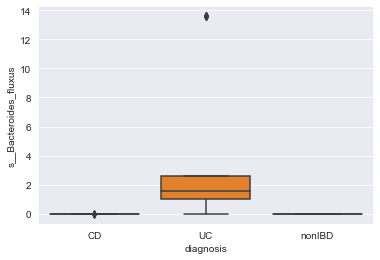

In [17]:
for column_name in feature_importances_mp.iloc[:,:-1]:
    print(column_name)
    sns.boxplot(data=feature_importances_mp, x="diagnosis", y=feature_importances_mp[column_name])
    plt.show()

In [18]:
feature_importances_mp = mp.loc[:,feature_importances.columns]
feature_importances_mp[:] = np.where(feature_importances_mp == 0,0,1)
feature_importances_mp['diagnosis'] = mp["diagnosis"]
feature_importances_mp

,s__Frisingicoccus_caecimuris,s__Intestinibacillus_sp_Marseille_P6563,s__GGB1420_SGB1957,s__GGB9697_SGB15213,s__Bacteroides_fluxus,s__Peptoniphilus_grossensis,s__Anaerostipes_sp_494a,s__Parasutterella_excrementihominis,s__Lactobacillus_gasseri,s__Bacilli_unclassified_SGB6428,...,s__GGB3510_SGB4687,s__GGB3118_SGB4130,s__Actinomyces_SGB17154,s__GGB6613_SGB9347,s__Desulfovibrio_desulfuricans,s__Clostridia_unclassified_SGB6371,s__GGB4676_SGB6465,s__Haemophilus_haemolyticus,s__GGB4769_SGB6602,diagnosis
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,CD
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,CD
2,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,UC
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,UC
4,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,UC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,nonIBD
79,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,nonIBD
80,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,CD
81,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,UC


s__Frisingicoccus_caecimuris


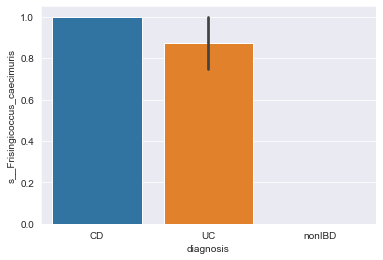

s__Intestinibacillus_sp_Marseille_P6563


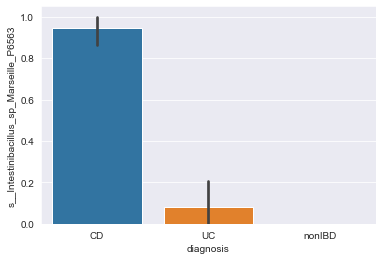

s__GGB1420_SGB1957


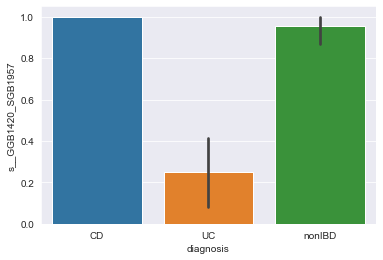

s__GGB9697_SGB15213


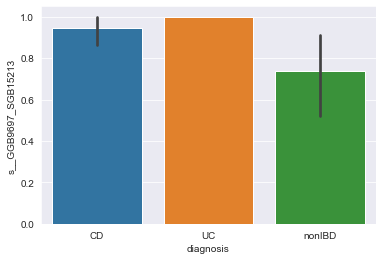

s__Bacteroides_fluxus


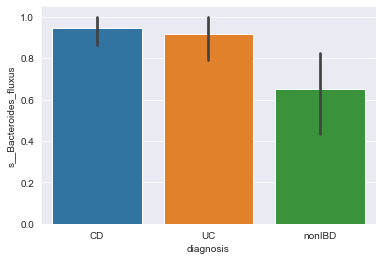

s__Peptoniphilus_grossensis


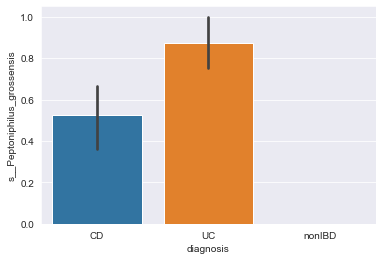

s__Anaerostipes_sp_494a


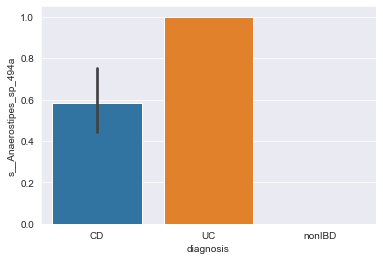

s__Parasutterella_excrementihominis


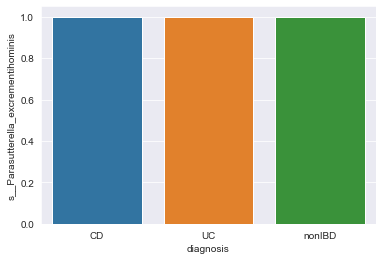

s__Lactobacillus_gasseri


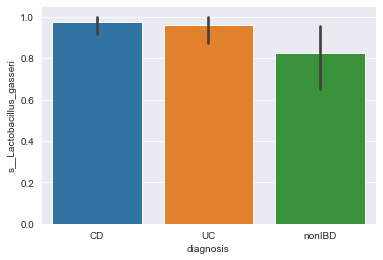

s__Bacilli_unclassified_SGB6428


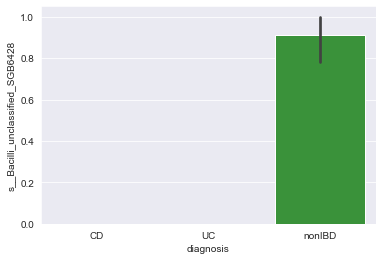

s__Odoribacter_laneus


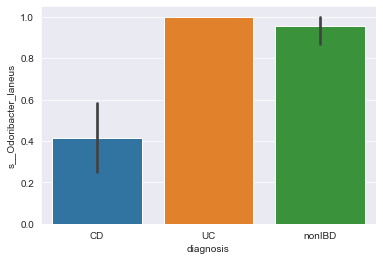

s__GGB3510_SGB4687


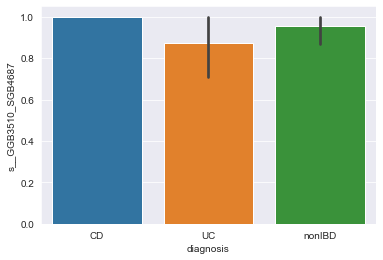

s__GGB3118_SGB4130


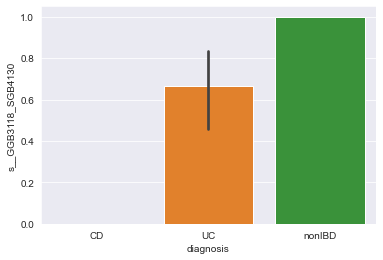

s__Actinomyces_SGB17154


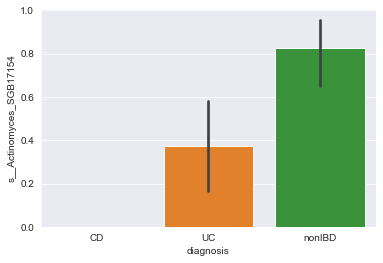

s__GGB6613_SGB9347


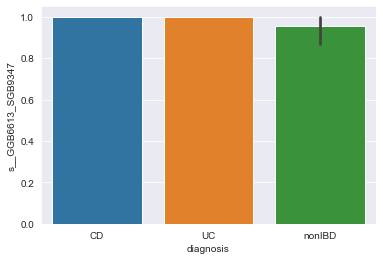

s__Desulfovibrio_desulfuricans


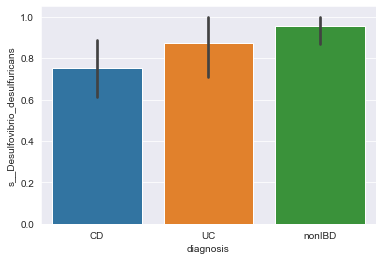

s__Clostridia_unclassified_SGB6371


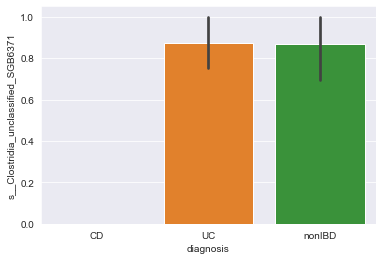

s__GGB4676_SGB6465


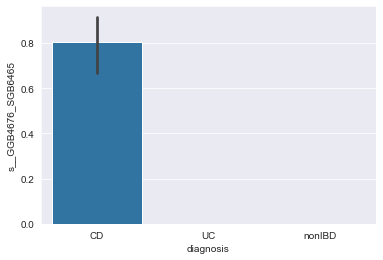

s__Haemophilus_haemolyticus


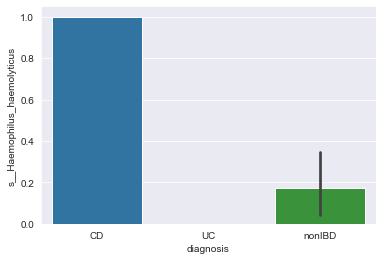

s__GGB4769_SGB6602


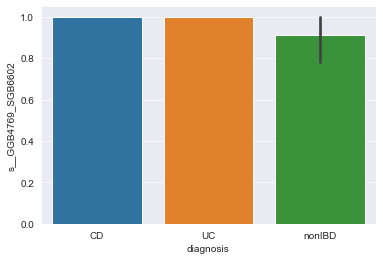

In [19]:
for column_name in feature_importances_mp.iloc[:,:-1]:
    print(column_name)
    sns.barplot(data=feature_importances_mp, x="diagnosis", y=feature_importances_mp[column_name])
    plt.show()